In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 10
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

주성분분석(Principal Component Analysis, PCA)

차원(피쳐의 개수)을 줄이면서도 데이터가 퍼져있는 정도(분산)는 최대한 유지하게 만들어서 고차원 데이터를 저차원 데이터로 차원을 축소하는 알고리즘을 말한다.  
주로 고차원 데이이터를 3차원 이하의 데이터로 바꿔 시각화하는데 많이 사용되며, 유용한 정보만 살려서 적은 메모리에 적용하거나 노이즈(잡음)를 줄이고 싶을 때도 사용되는 알고리즘 이다.

<img src="./pca1.png" align="left" wigth="1300"/>

<img src="./pca2.png" align="left" wigth="1300"/>

<img src="./pca3.png" align="left" wigth="1300"/>

<img src="./pca4.png" align="left" wigth="1300"/>

임의의 데이터 셋을 만든다.

In [2]:
datas = np.array([[5 * x, 5 * (np.sqrt(1 / 3) + 0.1 * np.random.normal(0, 1)) * x] for x in np.random.normal(0, 1, 30)])
print(datas)
print('=' * 80)
n_datas = datas - np.mean(datas, axis=0)
print(n_datas)

[[  4.67430371   3.32803299]
 [  9.79345615   6.13493877]
 [ -3.68916065  -1.76591219]
 [  1.98655572   0.96805351]
 [  3.75194125   2.32593628]
 [  6.4930271    4.01064703]
 [  1.50347949   0.63911001]
 [  6.72745057   3.57829735]
 [ -1.75842911  -0.98984275]
 [ -0.39770575  -0.2312865 ]
 [ -0.61888109  -0.38216231]
 [  2.85854827   1.61846299]
 [  3.43179696   2.042401  ]
 [ -3.68782179  -1.42411634]
 [ -4.21891703  -3.11992707]
 [ 11.27654349   4.08389251]
 [ -2.95140004  -1.6775993 ]
 [  1.50780963   1.01481106]
 [  8.40134139   3.90661016]
 [ -0.71758487  -0.42484629]
 [  3.18194709   1.75822091]
 [  0.83130231   0.33990402]
 [-10.77041058  -6.40274371]
 [  6.07471885   3.84612533]
 [ -0.12749786  -0.0519611 ]
 [  2.08868825   0.91459621]
 [  6.91573905   4.99643289]
 [  5.50079285   3.18092023]
 [ -2.17852882  -1.09434675]
 [ -4.32688754  -2.06892875]]
[[ 2.95576314e+00  2.35957565e+00]
 [ 8.07491558e+00  5.16648143e+00]
 [-5.40770121e+00 -2.73436953e+00]
 [ 2.68015155e-01 -4.038

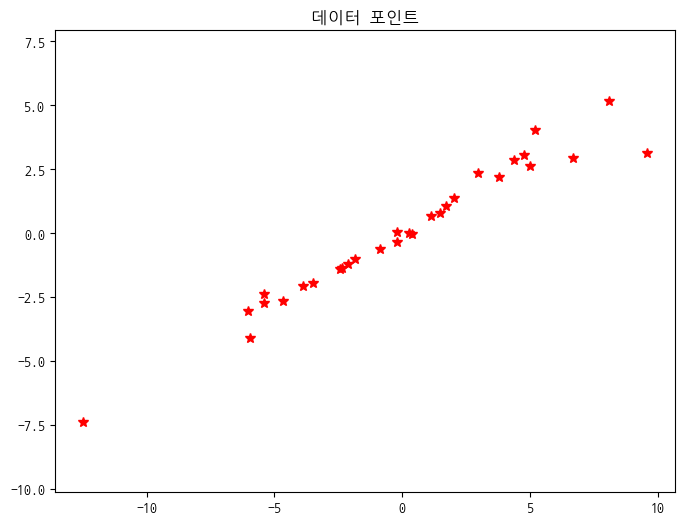

In [3]:
plt.figure(figsize=(8, 6))
plt.plot(n_datas[:, 0], n_datas[:, 1], '*r', markersize=7)
plt.title('데이터 포인트')
plt.axis('equal') # 각 축의 범위와 스케일을 동일하게 설정한다.
plt.show()

행렬 내적

In [4]:
A = np.array([[1, 2], [3, 4]])
print('A\n', A, sep='')
B = np.array([[1, -2], [2, 3]])
print('B\n', B, sep='')
print('=' * 80)
print('AB\n', np.dot(A, B), sep='')
print('AB\n', np.matmul(A, B), sep='')
print('AB\n', A @ B, sep='') # @ => 넘파이 배열 내적 연산자

A
[[1 2]
 [3 4]]
B
[[ 1 -2]
 [ 2  3]]
AB
[[ 5  4]
 [11  6]]
AB
[[ 5  4]
 [11  6]]
AB
[[ 5  4]
 [11  6]]


벡터 내적

x축으로 사영하면 y좌표는 무시되고 x좌표만 남는다.

In [5]:
# 벡터를 1행 2열로 만든다. 1행만 있으므로 행 벡터이다.
# print(np.array([1, 0]))
# 30행 2열인 2차원 배열을 행 백터 [1, 0]와 내적하면 결과는 데이터가 30개인 1차원 배열이된다.
proj_xaxis = np.dot(n_datas, np.array([1, 0]))
# print(proj_xaxis)
# reshape(-1, n): 열 개수는 n개로 고정하고 행은 상황에 따라 적절히 만든다.
# 데이터가 30개인 1차원 배열에 reshape(-1, n)를 실행하면 30행 1열인 2차원 배열이된다.
# print(proj_xaxis.reshape(-1, 1))
proj_xaxis2 = np.dot(proj_xaxis.reshape(-1, 1), np.array([[1, 0]]))
print(proj_xaxis2)

[[  2.95576314   0.        ]
 [  8.07491558   0.        ]
 [ -5.40770121  -0.        ]
 [  0.26801516   0.        ]
 [  2.03340068   0.        ]
 [  4.77448653   0.        ]
 [ -0.21506108  -0.        ]
 [  5.00891001   0.        ]
 [ -3.47696968  -0.        ]
 [ -2.11624632  -0.        ]
 [ -2.33742166  -0.        ]
 [  1.14000771   0.        ]
 [  1.7132564    0.        ]
 [ -5.40636236  -0.        ]
 [ -5.93745759  -0.        ]
 [  9.55800293   0.        ]
 [ -4.66994061  -0.        ]
 [ -0.21073094  -0.        ]
 [  6.68280083   0.        ]
 [ -2.43612544  -0.        ]
 [  1.46340652   0.        ]
 [ -0.88723825  -0.        ]
 [-12.48895115  -0.        ]
 [  4.35617828   0.        ]
 [ -1.84603843  -0.        ]
 [  0.37014768   0.        ]
 [  5.19719849   0.        ]
 [  3.78225229   0.        ]
 [ -3.89706939  -0.        ]
 [ -6.04542811  -0.        ]]


In [6]:
# 벡터를 1행 2열로 만들어서 reshape() 메소드로 2행 1열로 변환한다. 1열만 있으므로 열 벡터이다.
# print(np.array([1, 0]).reshape(2, 1))
proj_xaxis = np.dot(n_datas, np.array([1, 0]).reshape(2, 1))
# print(proj_xaxis)
proj_xaxis2 = np.dot(proj_xaxis, np.array([[1, 0]]))
print(proj_xaxis2)

[[  2.95576314   0.        ]
 [  8.07491558   0.        ]
 [ -5.40770121  -0.        ]
 [  0.26801516   0.        ]
 [  2.03340068   0.        ]
 [  4.77448653   0.        ]
 [ -0.21506108  -0.        ]
 [  5.00891001   0.        ]
 [ -3.47696968  -0.        ]
 [ -2.11624632  -0.        ]
 [ -2.33742166  -0.        ]
 [  1.14000771   0.        ]
 [  1.7132564    0.        ]
 [ -5.40636236  -0.        ]
 [ -5.93745759  -0.        ]
 [  9.55800293   0.        ]
 [ -4.66994061  -0.        ]
 [ -0.21073094  -0.        ]
 [  6.68280083   0.        ]
 [ -2.43612544  -0.        ]
 [  1.46340652   0.        ]
 [ -0.88723825  -0.        ]
 [-12.48895115  -0.        ]
 [  4.35617828   0.        ]
 [ -1.84603843  -0.        ]
 [  0.37014768   0.        ]
 [  5.19719849   0.        ]
 [  3.78225229   0.        ]
 [ -3.89706939  -0.        ]
 [ -6.04542811  -0.        ]]


In [7]:
# 벡터를 2행 1열로 만든다. 1열만 있으므로 열 벡터이다.
# print(np.array([[1], [0]]))
proj_xaxis = np.dot(n_datas, np.array([[1], [0]]))
# print(proj_xaxis)
proj_xaxis2 = np.dot(proj_xaxis, np.array([[1, 0]]))
print(proj_xaxis2)

[[  2.95576314   0.        ]
 [  8.07491558   0.        ]
 [ -5.40770121  -0.        ]
 [  0.26801516   0.        ]
 [  2.03340068   0.        ]
 [  4.77448653   0.        ]
 [ -0.21506108  -0.        ]
 [  5.00891001   0.        ]
 [ -3.47696968  -0.        ]
 [ -2.11624632  -0.        ]
 [ -2.33742166  -0.        ]
 [  1.14000771   0.        ]
 [  1.7132564    0.        ]
 [ -5.40636236  -0.        ]
 [ -5.93745759  -0.        ]
 [  9.55800293   0.        ]
 [ -4.66994061  -0.        ]
 [ -0.21073094  -0.        ]
 [  6.68280083   0.        ]
 [ -2.43612544  -0.        ]
 [  1.46340652   0.        ]
 [ -0.88723825  -0.        ]
 [-12.48895115  -0.        ]
 [  4.35617828   0.        ]
 [ -1.84603843  -0.        ]
 [  0.37014768   0.        ]
 [  5.19719849   0.        ]
 [  3.78225229   0.        ]
 [ -3.89706939  -0.        ]
 [ -6.04542811  -0.        ]]


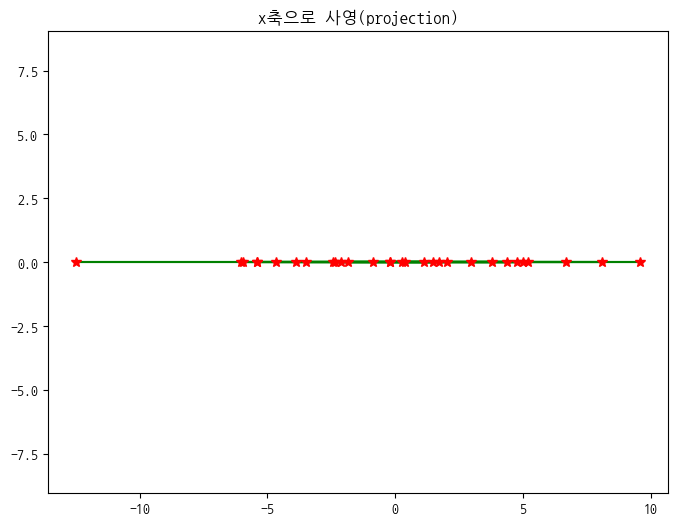

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(proj_xaxis2[:, 0], proj_xaxis2[:, 1], 'g')
plt.plot(proj_xaxis2[:, 0], proj_xaxis2[:, 1], '*r', markersize=7)
plt.title('x축으로 사영(projection)')
plt.axis('equal')
plt.show()

y축으로 사영하면 x좌표는 무시되고 y좌표만 남는다.

In [9]:
proj_yaxis = np.dot(n_datas, np.array([0, 1]))
proj_yaxis2 = np.dot(proj_yaxis.reshape(-1, 1), np.array([[0, 1]]))
print(proj_yaxis2)

[[ 0.00000000e+00  2.35957565e+00]
 [ 0.00000000e+00  5.16648143e+00]
 [-0.00000000e+00 -2.73436953e+00]
 [-0.00000000e+00 -4.03824932e-04]
 [ 0.00000000e+00  1.35747894e+00]
 [ 0.00000000e+00  3.04218969e+00]
 [-0.00000000e+00 -3.29347328e-01]
 [ 0.00000000e+00  2.60984001e+00]
 [-0.00000000e+00 -1.95830009e+00]
 [-0.00000000e+00 -1.19974383e+00]
 [-0.00000000e+00 -1.35061965e+00]
 [ 0.00000000e+00  6.50005647e-01]
 [ 0.00000000e+00  1.07394366e+00]
 [-0.00000000e+00 -2.39257367e+00]
 [-0.00000000e+00 -4.08838441e+00]
 [ 0.00000000e+00  3.11543517e+00]
 [-0.00000000e+00 -2.64605664e+00]
 [ 0.00000000e+00  4.63537169e-02]
 [ 0.00000000e+00  2.93815282e+00]
 [-0.00000000e+00 -1.39330363e+00]
 [ 0.00000000e+00  7.89763566e-01]
 [-0.00000000e+00 -6.28553320e-01]
 [-0.00000000e+00 -7.37120105e+00]
 [ 0.00000000e+00  2.87766799e+00]
 [-0.00000000e+00 -1.02041844e+00]
 [-0.00000000e+00 -5.38611328e-02]
 [ 0.00000000e+00  4.02797555e+00]
 [ 0.00000000e+00  2.21246289e+00]
 [-0.00000000e+00 -2

In [10]:
proj_yaxis = np.dot(n_datas, np.array([0, 1]).reshape(2, 1))
proj_yaxis2 = np.dot(proj_yaxis, np.array([[0, 1]]))
print(proj_yaxis2)

[[ 0.00000000e+00  2.35957565e+00]
 [ 0.00000000e+00  5.16648143e+00]
 [-0.00000000e+00 -2.73436953e+00]
 [-0.00000000e+00 -4.03824932e-04]
 [ 0.00000000e+00  1.35747894e+00]
 [ 0.00000000e+00  3.04218969e+00]
 [-0.00000000e+00 -3.29347328e-01]
 [ 0.00000000e+00  2.60984001e+00]
 [-0.00000000e+00 -1.95830009e+00]
 [-0.00000000e+00 -1.19974383e+00]
 [-0.00000000e+00 -1.35061965e+00]
 [ 0.00000000e+00  6.50005647e-01]
 [ 0.00000000e+00  1.07394366e+00]
 [-0.00000000e+00 -2.39257367e+00]
 [-0.00000000e+00 -4.08838441e+00]
 [ 0.00000000e+00  3.11543517e+00]
 [-0.00000000e+00 -2.64605664e+00]
 [ 0.00000000e+00  4.63537169e-02]
 [ 0.00000000e+00  2.93815282e+00]
 [-0.00000000e+00 -1.39330363e+00]
 [ 0.00000000e+00  7.89763566e-01]
 [-0.00000000e+00 -6.28553320e-01]
 [-0.00000000e+00 -7.37120105e+00]
 [ 0.00000000e+00  2.87766799e+00]
 [-0.00000000e+00 -1.02041844e+00]
 [-0.00000000e+00 -5.38611328e-02]
 [ 0.00000000e+00  4.02797555e+00]
 [ 0.00000000e+00  2.21246289e+00]
 [-0.00000000e+00 -2

In [11]:
proj_yaxis = np.dot(n_datas, np.array([[0], [1]]))
proj_yaxis2 = np.dot(proj_yaxis, np.array([[0, 1]]))
print(proj_yaxis2)

[[ 0.00000000e+00  2.35957565e+00]
 [ 0.00000000e+00  5.16648143e+00]
 [-0.00000000e+00 -2.73436953e+00]
 [-0.00000000e+00 -4.03824932e-04]
 [ 0.00000000e+00  1.35747894e+00]
 [ 0.00000000e+00  3.04218969e+00]
 [-0.00000000e+00 -3.29347328e-01]
 [ 0.00000000e+00  2.60984001e+00]
 [-0.00000000e+00 -1.95830009e+00]
 [-0.00000000e+00 -1.19974383e+00]
 [-0.00000000e+00 -1.35061965e+00]
 [ 0.00000000e+00  6.50005647e-01]
 [ 0.00000000e+00  1.07394366e+00]
 [-0.00000000e+00 -2.39257367e+00]
 [-0.00000000e+00 -4.08838441e+00]
 [ 0.00000000e+00  3.11543517e+00]
 [-0.00000000e+00 -2.64605664e+00]
 [ 0.00000000e+00  4.63537169e-02]
 [ 0.00000000e+00  2.93815282e+00]
 [-0.00000000e+00 -1.39330363e+00]
 [ 0.00000000e+00  7.89763566e-01]
 [-0.00000000e+00 -6.28553320e-01]
 [-0.00000000e+00 -7.37120105e+00]
 [ 0.00000000e+00  2.87766799e+00]
 [-0.00000000e+00 -1.02041844e+00]
 [-0.00000000e+00 -5.38611328e-02]
 [ 0.00000000e+00  4.02797555e+00]
 [ 0.00000000e+00  2.21246289e+00]
 [-0.00000000e+00 -2

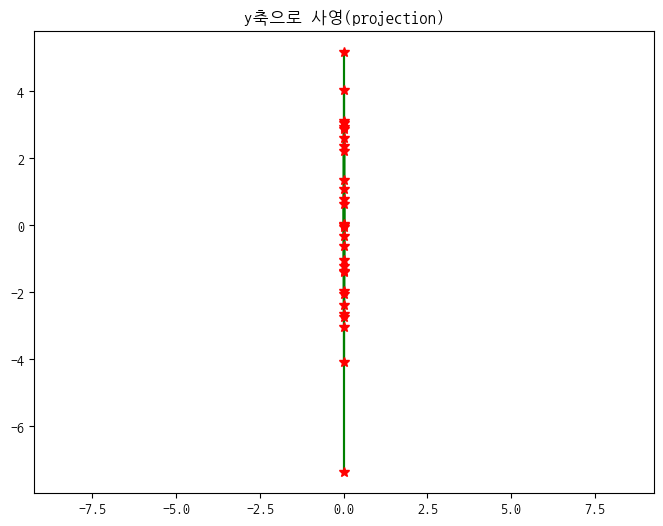

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(proj_yaxis2[:, 0], proj_yaxis2[:, 1], 'g')
plt.plot(proj_yaxis2[:, 0], proj_yaxis2[:, 1], '*r', markersize=7)
plt.title('y축으로 사영(projection)')
plt.axis('equal')
plt.show()

데이터를 임의로 설정한 선 위로 사영한다.

In [13]:
# print(np.array([np.cos(np.pi / 6), np.sin(np.pi / 6)]))
proj_line = np.dot(n_datas, np.array([np.cos(np.pi / 6), np.sin(np.pi / 6)]))
# print(proj_line)
proj_line2 = np.dot(proj_line.reshape(-1, 1), np.array([[np.cos(np.pi / 6), np.sin(np.pi / 6)]]))
print(proj_line2)

[[  3.23854858   1.8697769 ]
 [  8.29333877   4.78816137]
 [ -5.23979265  -3.0251957 ]
 [  0.20083651   0.11595301]
 [  2.11285614   1.21985806]
 [  4.89817167   2.82796073]
 [ -0.30390738  -0.17546101]
 [  4.88677638   2.82138166]
 [ -3.45569607  -1.99514706]
 [ -2.10668906  -1.2162975 ]
 [ -2.33790171  -1.34978818]
 [  1.13646648   0.65613923]
 [  1.74997354   1.0103477 ]
 [ -5.09078656  -2.93916699]
 [ -6.22341557  -3.59309066]
 [  8.51752519   4.91759546]
 [ -4.64823159  -2.68365776]
 [ -0.13797646  -0.07966074]
 [  6.28435811   3.62827585]
 [ -2.43041225  -1.40319917]
 [  1.43953255   0.8311145 ]
 [ -0.93760026  -0.54132376]
 [-12.55853704  -7.25067474]
 [  4.5132005    2.60569752]
 [ -1.82638297  -1.0544627 ]
 [  0.25428821   0.14681337]
 [  5.64206344   3.25744685]
 [  3.79471375   2.19087901]
 [ -3.81602241  -2.20318157]
 [ -5.84929784  -3.37709368]]


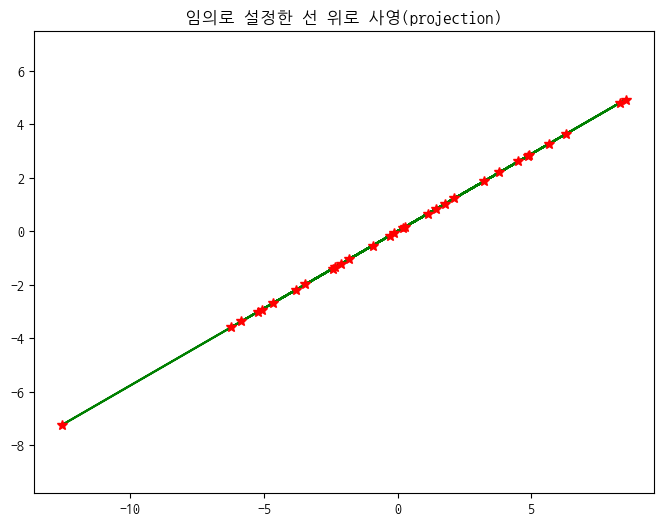

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(proj_line2[:, 0], proj_line2[:, 1], 'g')
plt.plot(proj_line2[:, 0], proj_line2[:, 1], '*r', markersize=7)
plt.title('임의로 설정한 선 위로 사영(projection)')
plt.axis('equal')
plt.show()

In [15]:
# 표준편차가 큰게 데이터 과학 입장에서는 데이터의 분포를 잘 보존하고 있다고 생각할 수 있다.
# 임의로 설정 선의 표준편차가 가장 크므로 x축이나 y축 보다는 임의의 선으로 정사영하는 것이 좋다.
print(np.std(proj_xaxis)) # x축 위로 사영
print(np.std(proj_yaxis)) # y축 위로 사영
print(np.std(proj_line)) # 임의로 설정한 선위 사영

4.776146565765671
2.679743100655285
5.453069676047825


공분산(Covariance)

두 집단간 상호 연관성(상관 관계)을 측정하는 도구로 X에서 X의 기대값(평균)을 뺀 편차에서 Y에서 Y의 기대값을 뺀 편차의 제곱에 대한 기대값으로 계산한다.

$$E((X - E(X))(Y - E(Y))$$

$x = \{x_1, x_2, \ldots, x_n\}$이고 $y = \{y_1, y_2, \ldots, y_n\}$일 때 $x$와 $y$의 공분산은 아래와 같이 계산한다.

$$\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \mu_x)(y_i - \mu_y) $$

$n-1$로 계산하는 이유는 표본에 대한 분산이기 때문이다. 모집단에 대해서 공분산을 계산할 때는 $n$으로 계산한다.

$Z = \begin{bmatrix} x_1 & x_2 & \cdots x_n \\ y_1 & y_2 & \cdots y_n \end{bmatrix}$ 이고  $\mu_x = \mu_y=0$일 경우 공분산 행렬은 $\Sigma =\begin{bmatrix} {\rm Var}(x) & {\rm Cov}(x,y) \\ {\rm Cov}(y,x) & {\rm Var}(y) \end{bmatrix}$와 같이 계산할 수 있고 $ ZZ^T = \begin{bmatrix} \langle x, x\rangle  &\langle x, y \rangle \\ \langle y, x \rangle &\langle y, y \rangle \end{bmatrix}$와 비례한다.

In [16]:
print((n_datas.T @ n_datas) / 29)
# ddof(delta degrees of freedom, 자유도)는 0이면 N으로 나누는 것이고, 1이면 (N-1)로 나누는 것이다.
print(np.var(n_datas[:, 0], ddof=1)) # x의 분산
print(np.var(n_datas[:, 1], ddof=1)) # y의 분산
# 넘파이의 cov() 메소드로 공분산 행렬을 계산할 수 있다.
print(np.cov(n_datas.T, ddof=1))

[[23.59818209 12.93905395]
 [12.93905395  7.42864457]]
23.598182087250226
7.42864457121683
[[23.59818209 12.93905395]
 [12.93905395  7.42864457]]


PCA 예제1

In [17]:
sigma = n_datas.T @ n_datas / 29 # 공분산 행렬
# print(sigma)
# 넘파이의 linalg.eig() 메소드는 공분산 행렬을 인수로 넘겨받아 고유값과 고유 벡터로 이루어진 행렬을 계한해 리턴한다.
las, evs = np.linalg.eig(sigma)
print(las) # 고유값, 피쳐가 2개이기 때문에 고유값이 2개가 나온다.
# 고유 벡터 행렬의 첫 번째 열 벡터가 첫 번째 고유값에 두 번째 열 벡터가 두 번째 고유값에 대응된다.
# 원래 특성의 x값에 열 벡터의 첫 번째 값을 곱하고 y값에 열 벡터의 두 번째 값을 곱한 특성을 새로운 특성으로 사용하면
# 데이터의 분포를 거의 유지하면서 1차원으로 데이터를 나타낼 수 있다는 의미이다.
print(evs) # 고유 벡터 행렬

[30.77062811  0.25619854]
[[ 0.87461365 -0.48482055]
 [ 0.48482055  0.87461365]]


In [18]:
u1 = evs[:, 0] # 첫 번째 특성 벡터, x축
print(u1)
proj_u1 = np.dot(n_datas, u1) # 원래 데이터와 첫 번째 특성 벡터의 내적
print(proj_u1)

[0.87461365 0.48482055]
[  3.72912155   9.56724774  -6.05532783   0.23421393   2.43657368
   5.65074716  -0.3477697    5.64616513  -3.99042926  -2.43255838
  -2.69914905   1.3122024    2.01910739  -5.88844719  -7.17511422
   9.86998681  -5.36725643  -0.16183492   7.26934568  -2.80617079
   1.66280892  -1.08072625 -14.49671687   5.20512556  -2.10929023
   0.29762323   6.49838605   4.38065695  -4.40851989  -6.76000113]


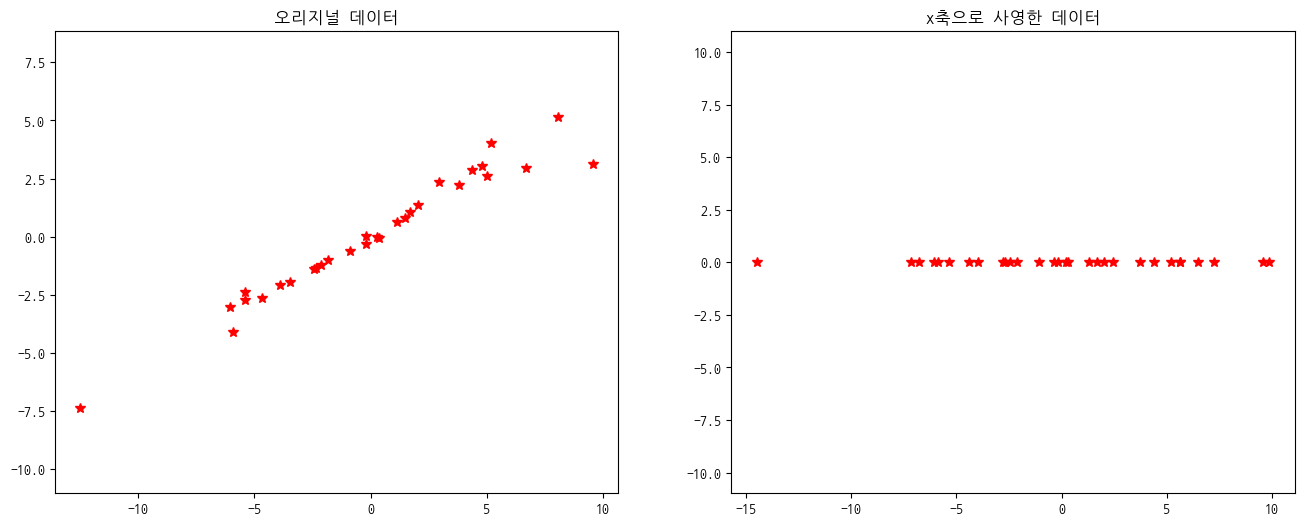

In [19]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(n_datas[:, 0], n_datas[:, 1], '*r', markersize=7)
plt.title('오리지널 데이터')
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.plot(proj_u1, np.zeros_like(proj_u1), '*r', markersize=7)
plt.title('x축으로 사영한 데이터')
plt.axis('equal')

plt.show()

In [20]:
u2 = evs[:, 1] # 두 번째 특성 벡터, y축
print(u2)
proj_u2 = np.dot(n_datas, u2) # 원래 데이터와 두 번째 특성 벡터의 내적
print(proj_u2)

[-0.48482055  0.87461365]
[ 0.63070237  0.6037902   0.23024774 -0.13029244  0.20143518  0.34597146
 -0.18378564 -0.14582079 -0.02704965 -0.02331264 -0.04804033  0.01580465
  0.10866388  0.52853796 -0.69715538 -1.90911407 -0.0501941   0.14270828
 -0.67021058 -0.03751871 -0.01875155 -0.11958998 -0.39205294  0.40488297
  0.00252546 -0.22656288  1.00321379  0.10133663  0.0852227   0.27440842]


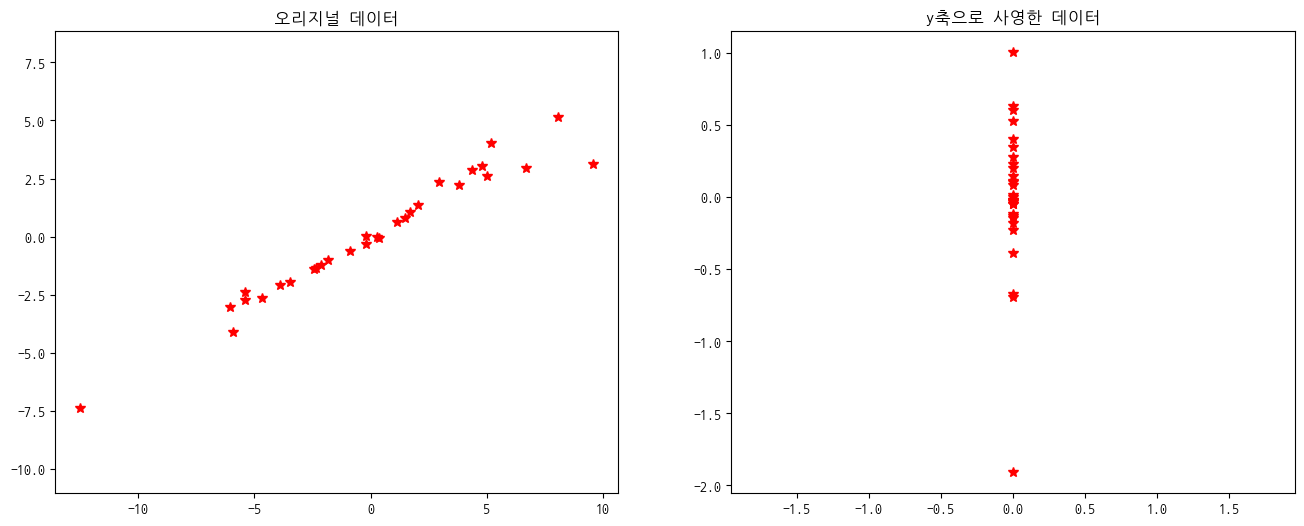

In [21]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(n_datas[:, 0], n_datas[:, 1], '*r', markersize=7)
plt.title('오리지널 데이터')
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.plot(np.zeros_like(proj_u2), proj_u2, '*r', markersize=7)
plt.title('y축으로 사영한 데이터')
plt.axis('equal')

plt.show()

In [22]:
# 임의로 만든 선에 사영한 것 보다 고유 벡터를 사용해서 사영한 것의 분산이 조금 더 큰 것을 확인할 수 있다.
print(np.std(proj_line))
print(np.std(proj_u1))

5.453069676047825
5.453892234901825


PCA 예제2

In [23]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [24]:
print(digits.data[0])
print(digits.data[0].reshape(8, 8))

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


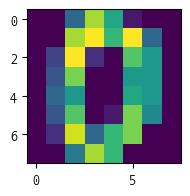

target value: 0


In [25]:
plt.figure(figsize=(2, 2))
plt.imshow(digits.data[0].reshape(8, 8))
plt.show()
print('target value: {}'.format(digits.target[0]))

In [26]:
X = digits.data.copy()
X = X.T # 행렬을 전치하여 각 특징 벡터를 열 벡터로 만든다.
X = X - np.mean(X, axis=1).reshape(-1, 1) # 브로드캐스팅을 이용해 평균이 0이 되도록 해서 중심을 맞춘다.
sigma = np.dot(X, X.T) # 공분산 행렬을 계산한다.
las, evs = np.linalg.eig(sigma) # 고유값과 고유 벡터를 계산한다.
print(len(las))
print(las[:6])
# 처음 고유값 2개를 더한 값이 전체 고유값의 합 중에서 28.5%를 차지하므로 피쳐를 2개만 사용하더라도 
# 전체 데이터의 분산을 28.5% 보존하고 있음을 알 수 있다.
print(sum(las[:2]) / sum(las))

64
[321496.44645596 294037.07339949 254652.03660974 181576.27386432
 124845.64540141 106158.91069579]
0.28509364823699307


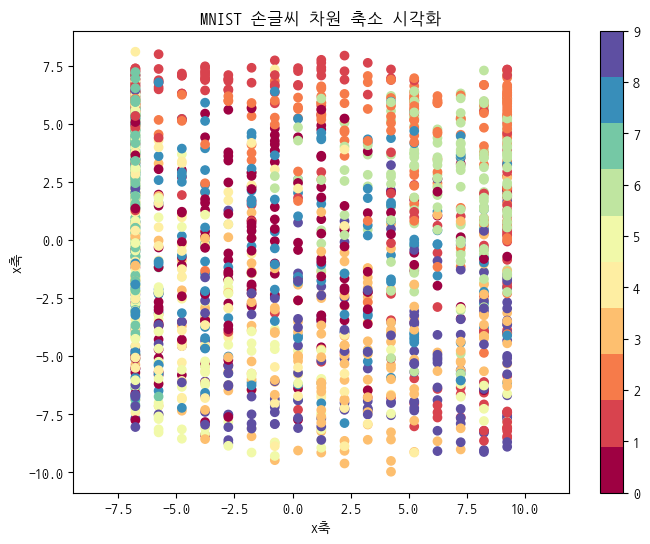

In [27]:
first_components = np.dot(evs[0], X)
second_components = np.dot(evs[1], X)

plt.figure(figsize=(8, 6))
plt.scatter(first_components, second_components, c=digits.target, cmap=plt.cm.get_cmap('Spectral', 10))
plt.title('MNIST 손글씨 차원 축소 시각화')
plt.xlabel('x축')
plt.ylabel('x축')
plt.axis('equal')
plt.colorbar()
plt.show()